In [ ]:
"""
-content(原本colab 已經存在的根目錄)
  |
  |
  |-dataset
  |  |--split_train
  |  |
  |  |--split_validation
  |-Test.csv
  |-Train.csv
"""

'\n-content(原本colab 已經存在的根目錄)\n  |\n  |\n  |-dataset\n  |  |--split_train\n  |  |\n  |  |--split_validation\n  |-Test.csv\n  |-Train.csv\n'

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:

%cd /gdrive/My Drive/

/gdrive/My Drive


In [ ]:
import os
os.getcwd()

'/gdrive/My Drive'

In [ ]:
import pandas as pd

In [ ]:
# 我先將檔案存到colab的根目錄，再讀取成dataframe
train_df = pd.read_csv('/content/Train.csv')
display(train_df)



,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021
...,...,...,...,...,...,...
26063,ID_3II1SXC0ZO,L1084F03259C39S12149Rp41671.jpg,M,DR,30,SR2021
26064,ID_OE7OU9ZF4U,L406F04369C01S07190Rp22847.jpg,V,G,0,LR2021
26065,ID_20M531UIZZ,L134F00766C01S09784Rp26034.jpg,M,G,0,LR2021
26066,ID_BZBV2FH0KL,L1153F02464C01S00194Rp01561.jpg,F,G,0,SR2020


In [ ]:
"""
用於split_data函數
"""
import random
from shutil import copyfile
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    """
    Splits the data into train and test sets

    Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

    Returns:
    None
    """
    listdir_image_source = os.listdir(SOURCE_DIR)

    for dir in listdir_image_source:
        if os.path.getsize(os.path.join(SOURCE_DIR,dir)) == 0:
            listdir_image_source.remove(dir)
            filename = dir
            print(f'{filename} is zero length, so ignoring.')

    number_of_available_images = len(listdir_image_source)
    file_to_training_dir = random.sample( listdir_image_source, int(len(listdir_image_source) * SPLIT_SIZE) )
    file_to_validation_dir = list( set(listdir_image_source).difference(set(file_to_training_dir)) )
    for dir in file_to_training_dir:
        source = os.path.join(SOURCE_DIR, dir)
        destination = TRAINING_DIR
        copyfile(source, os.path.join(destination, dir))

    for dir in file_to_validation_dir:
        source = os.path.join(SOURCE_DIR, dir)
        destination = VALIDATION_DIR
        copyfile(source, os.path.join(destination, dir))

In [ ]:
SOURCE_DIR = 'Zindi_photos/train' # 描述google drive 目錄時，你不需要在Zindi_photos前面加上"/"符號，不然會認不出來。
TRAINING_DIR = '/content/dataset/split_train' # 但是colab上面卻可以在最前面加上"/"符號，這是一個不同之處。
VALIDATION_DIR = '/content/dataset/split_validation'
SPLIT_SIZE = 0.8


In [ ]:
"""
勿刪!!!!
"""
# 你不要在laptop上一直用這個函數，否則會重複load檔案!!!

split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE)

In [ ]:
test_df = pd.read_csv('/content/Test.csv') # 沒有labels
display(test_df)

,ID,filename,growth_stage,damage,season
0,ID_ROOWKB90UZ,L122F00315C01S02151Rp04021.jpg,V,WD,SR2020
1,ID_PTEDRY0CYM,L1089F03254C01S08845Rp25119.jpg,F,WD,LR2021
2,ID_5WJXDV96R4,L365F01913C39S12578Rp42918.jpg,V,WD,SR2021
3,ID_DM4AQLXXYG,223_repeat_2_2230_3599_2343.JPG,F,G,LR2020
4,ID_V6YTIT7I2S,L354F00276C01S08045Rp23693.jpg,F,G,LR2021
...,...,...,...,...,...
8658,ID_VYEB1ABJYA,L1122F01093C01S10236Rp20455.jpg,V,WD,LR2021
8659,ID_HQT6T7QYA4,L322F03389C39S14157Rp40614.jpg,V,WD,SR2021
8660,ID_FKC93FVGL1,L134F00855C01S05273Rp06412.jpg,V,WD,SR2020
8661,ID_EEJLBVEFGI,L410F02877C01S02293Rp01971.jpg,V,WD,SR2020


In [ ]:
# 你這裡要重新生成一個特別給split_train和split_test的 list_file
# 而且標籤的順序還要跟list裡面的順序一樣
list_split_train = os.listdir(TRAINING_DIR)
list_split_validation = os.listdir(VALIDATION_DIR)

In [ ]:
list_split_train[:10]

['L222F03152C42S12803Rp46720.jpg',
 'L1127F01620C39S12747Rp39456.jpg',
 'L1146F02086C01S03562Ip.jpg',
 'L361F00187C01S07740Rp29994.jpg',
 'L376F04701C39S12389Rp33697.jpg',
 'L1149F01112C01S00291Rp05655.jpg',
 'L429F01328C01S01599Rp11668.jpg',
 'L1089F01745C01S07706Rp23743.jpg',
 'L1122F00056C01S08920Rp19327.jpg',
 'L323F02888C01S01282Rp10774.jpg']

In [ ]:
# 資料順序跟train_df相同，只是不在list_split_train中的會排除掉。
split_train_df = train_df[train_df['filename'].isin(list_split_train)]
# 只留下['filename', 'extent'] 做成訓練集
train_data = split_train_df[['filename', 'extent']]
print(train_data.shape)
train_data.head(10)

(20854, 2)


,filename,extent
0,L427F01330C01S03961Rp02052.jpg,0
1,L1083F00930C39S12674Ip.jpg,0
2,24_initial_1_1463_1463.JPG,0
3,L341F00167C01S00324Rp14178.jpg,60
4,L1084F02394C39S13931Ip.jpg,0
5,L361F02347C01S10018Rp27925.jpg,0
6,L1122F02114C01S09921Rp29452.jpg,0
7,L321F03728C01S07028Rp24013.jpg,0
8,L331F04678C01S11060Rp30683.jpg,40
9,L133F00737C01S06945Rp25674.jpg,60


In [ ]:
train_data['label'] = train_data['extent'].map(lambda x: str(0) if x == 0 else str(1))
#train_data['extent'] = train_data['extent'].map(lambda x: str(0) if x == 0 else str(1))

<ipython-input-21-9c483c569e58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['label'] = train_data['extent'].map(lambda x: str(0) if x == 0 else str(1))


In [ ]:
train_data.head(10)

,filename,extent,label
0,L427F01330C01S03961Rp02052.jpg,0,0
1,L1083F00930C39S12674Ip.jpg,0,0
2,24_initial_1_1463_1463.JPG,0,0
3,L341F00167C01S00324Rp14178.jpg,60,1
4,L1084F02394C39S13931Ip.jpg,0,0
5,L361F02347C01S10018Rp27925.jpg,0,0
6,L1122F02114C01S09921Rp29452.jpg,0,0
7,L321F03728C01S07028Rp24013.jpg,0,0
8,L331F04678C01S11060Rp30683.jpg,40,1
9,L133F00737C01S06945Rp25674.jpg,60,1


In [ ]:
groups = train_data.groupby('label')
display(groups.size())

label
0    17286
1     3568
dtype: int64

In [ ]:
# Resample the train_data
N = 12000 #resample size
df_resample_train_data = pd.DataFrame({})
for i in groups.size().index:
  resample = groups.get_group(i).sample(n=N, replace=True)
  df_resample_train_data = pd.concat([df_resample_train_data, resample])
  del(resample)
display(df_resample_train_data.iloc[:,:-1])
display(df_resample_train_data.iloc[:,-1])

,filename,extent
17874,L1142F01857C20S10718Rp19715.jpg,0
16747,L122F00610C39S13857Rp48833.jpg,0
13845,L406F00362C01S00614Rp08568.jpg,0
6278,L398F02699C39S14197Rp41490.jpg,0
11037,L1153F00463C39S12041Rp32678.jpg,0
...,...,...
8518,L133F00087C39S14336Rp47508.jpg,70
13693,L1127F00485C01S08221Rp22717.jpg,20
13723,L1083F03572C01S02068Rp07263.jpg,80
6973,L133F01782C01S09818Rp30750.jpg,30


17874    0
16747    0
13845    0
6278     0
11037    0
        ..
8518     1
13693    1
13723    1
6973     1
11727    1
Name: label, Length: 24000, dtype: object

In [ ]:
# 資料順序跟train_df相同，只是不在list_split_validation中的會排除掉。
split_valid_df = train_df[train_df['filename'].isin(list_split_validation)]
# 只留下['filename', 'extent'] 做成訓練集
valid_data = split_valid_df[['filename', 'extent']]
valid_data.shape
valid_data.head(1000)

,filename,extent
12,L415F01160C39S14146Rp41363.jpg,0
20,L121F00604C01S09000Rp18923.jpg,0
21,L315F03220C01S02273Rp03569.jpg,0
23,L133F03014C01S00293Rp10017.jpg,50
27,L332F03390C01S00334Rp07705.jpg,0
...,...,...
5040,L405F00476C01S08299Rp32226.jpg,0
5042,L121F03179C01S02660Rp09953.jpg,0
5056,L1150F00049C40S11863Rp35125.jpg,0
5057,L221F03419C39S13056Rp48784.jpg,0


In [ ]:
valid_data['label'] = valid_data['extent'].map(lambda x: str(0) if x == 0 else str(1))

<ipython-input-26-d43e1dc81075>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['label'] = valid_data['extent'].map(lambda x: str(0) if x == 0 else str(1))


In [ ]:
valid_data.head(1000)

,filename,extent,label
12,L415F01160C39S14146Rp41363.jpg,0,0
20,L121F00604C01S09000Rp18923.jpg,0,0
21,L315F03220C01S02273Rp03569.jpg,0,0
23,L133F03014C01S00293Rp10017.jpg,50,1
27,L332F03390C01S00334Rp07705.jpg,0,0
...,...,...,...
5040,L405F00476C01S08299Rp32226.jpg,0,0
5042,L121F03179C01S02660Rp09953.jpg,0,0
5056,L1150F00049C40S11863Rp35125.jpg,0,0
5057,L221F03419C39S13056Rp48784.jpg,0,0


In [ ]:
INPUT_SHAPE = (250, 250, 3)
TARGET_SIZE = (250, 250)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)


# data 是一個包含 'filename'和 'extent'的dataframe，x_col 設為'filename', y_col設為'extent'
train_generator = train_datagen.flow_from_dataframe(dataframe=df_resample_train_data[['filename','label']], directory=TRAINING_DIR,
                                              x_col="filename", y_col="label", has_ext=True,
                                              class_mode="binary", target_size=TARGET_SIZE,
                                              batch_size=128)

# valid_data 是一個包含 'filename'和 'extent'的dataframe，x_col 設為'filename', y_col設為'extent'
validation_generator = validation_datagen.flow_from_dataframe(dataframe=valid_data[['filename','label']], directory=VALIDATION_DIR,
                                              x_col="filename", y_col="label", has_ext=True,
                                              class_mode="binary", target_size=TARGET_SIZE,
                                              batch_size=128)



Found 24000 validated image filenames belonging to 2 classes.
Found 5214 validated image filenames belonging to 2 classes.


'\n# data 是一個包含 \'filename\'和 \'extent\'的dataframe，x_col 設為\'filename\', y_col設為\'extent\'\ntrain_generator = train_datagen.flow_from_dataframe(dataframe=train_data, directory=TRAINING_DIR,\n                                              x_col="filename", y_col="extent", has_ext=True,\n                                              class_mode="other", target_size=TARGET_SIZE,\n                                              batch_size=128)\n\n# valid_data 是一個包含 \'filename\'和 \'extent\'的dataframe，x_col 設為\'filename\', y_col設為\'extent\'\nvalidation_generator = validation_datagen.flow_from_dataframe(dataframe=valid_data, directory=VALIDATION_DIR,\n                                              x_col="filename", y_col="extent", has_ext=True,\n                                              class_mode="other", target_size=TARGET_SIZE,\n                                              batch_size=128)\n'

In [ ]:

# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


--2023-09-18 06:16:41--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.207, 108.177.126.207, 142.251.31.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  26.0MB/s    in 3.2s    

2023-09-18 06:16:44 (26.0 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = INPUT_SHAPE,
                                include_top = False,
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 250, 250, 3)]        0         []                            
                                                                                                  
 conv2d_394 (Conv2D)         (None, 124, 124, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_376 (B  (None, 124, 124, 32)         96        ['conv2d_394[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_376 (Activation  (None, 124, 124, 32)         0         ['batch_normalizati

In [ ]:
feature_extraction_layer = pre_trained_model.get_layer('mixed0')
conv1 = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(feature_extraction_layer.output)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
conv2 = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(pool1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
conv3 = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(pool2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv3)
flatten_features = tf.keras.layers.Flatten()(pool3)
flatten_features_drop = tf.keras.layers.Dropout(0.65)(flatten_features)
x1 = tf.keras.layers.Dense(1024)(flatten_features)
x1_drop = tf.keras.layers.Dropout(0.45)(x1) #0.3
x2 = tf.keras.layers.Dense(256)(x1_drop)
x3 = tf.keras.layers.Dense(1, activation = 'sigmoid')(x2)
print('layer shape: ', flatten_features.shape)
#print('last feature extraction layer shape: ', flatten_features.output_shape)

layer shape:  (None, 128)


In [ ]:
Stop_val_accuracy = 0.85
Stop_accuracy = 0.83
class myCallback(tf.keras.callbacks.Callback): #要記得繼承，否則這個類別只有你後來定義的函數
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > Stop_accuracy:
                # Stop training once the above condition is met
                self.model.stop_training = True
                print("\nTrain accuracy reached ", Stop_accuracy * 100,"% accuracy so cancelling training!")
            if logs.get('val_accuracy') is not None and logs.get('val_accuracy') > Stop_val_accuracy:
                # Stop training once the above condition is met
                self.model.stop_training = True
                print("\nValidation accuracy reached ", Stop_val_accuracy * 100,"% accuracy so cancelling training!")

In [ ]:
checkpoint_path = "/content/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

In [ ]:
from keras.applications import InceptionV3
from keras.models import Model

model = Model(inputs=pre_trained_model.input, outputs=x3)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 3 * 1e-5), loss='binary_crossentropy', metrics='accuracy') #Adam learning_rate=3 * 1e-5

In [ ]:
callbacks = myCallback()
history = model.fit(train_generator, validation_data=validation_generator, verbose = 1, epochs = 10 ,callbacks=[callbacks, cp_callback] )

Epoch 1/10
188/188 [==============================] - ETA: 0s - loss: 0.6399 - accuracy: 0.6236
Epoch 1: saving model to /content/cp.ckpt
188/188 [==============================] - 412s 2s/step - loss: 0.6399 - accuracy: 0.6236 - val_loss: 0.5487 - val_accuracy: 0.7367
Epoch 2/10
188/188 [==============================] - ETA: 0s - loss: 0.5194 - accuracy: 0.7465
Epoch 2: saving model to /content/cp.ckpt
188/188 [==============================] - 422s 2s/step - loss: 0.5194 - accuracy: 0.7465 - val_loss: 0.5282 - val_accuracy: 0.7348
Epoch 3/10
188/188 [==============================] - ETA: 0s - loss: 0.4705 - accuracy: 0.7820
Epoch 3: saving model to /content/cp.ckpt
188/188 [==============================] - 416s 2s/step - loss: 0.4705 - accuracy: 0.7820 - val_loss: 0.4888 - val_accuracy: 0.7656
Epoch 4/10
188/188 [==============================] - ETA: 0s - loss: 0.4375 - accuracy: 0.8022
Epoch 4: saving model to /content/cp.ckpt
188/188 [==============================] - 417s 2s/s

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


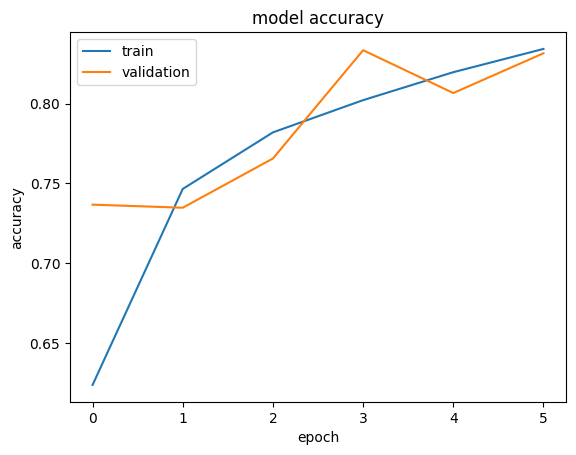

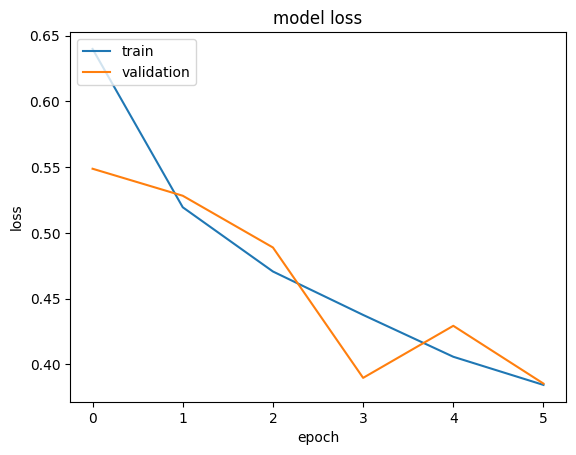

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()